# Identitas Diri

Nama : Hasan Nur Wakhid

NIM  : A11.2021.13853

# Menambahkan library
 "numpy" berguna memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya.    
 "matpotlib.pyplot" berguna untuk memvisualisaikan data melalui grafik atau diagram      
 "pandas" berguna untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset
Memuat dan menampilkan 5 data teratas pada dataset

In [169]:
data = pd.read_csv('exams.csv')
data.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59.0,70,78
1,male,group D,associate's degree,standard,none,96.0,93,87
2,female,group D,some college,free/reduced,none,57.0,76,77
3,male,group B,some college,free/reduced,none,70.0,70,63
4,NaN,group D,associate's degree,standard,none,83.0,85,86


# Menampilkan informasi dari dataset

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       977 non-null    object 
 1   ethnicity                    1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        992 non-null    object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   996 non-null    float64
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


# Menampilkan data unik pada atribut lunch

In [171]:
data['lunch'].unique()

array(['standard', 'free/reduced', nan], dtype=object)

# Menentukan batasan

In [172]:
free_lunch = 'free/reduced'
data[data['lunch']==free_lunch]

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group D,some college,free/reduced,none,57.0,76,77
3,male,group B,some college,free/reduced,none,70.0,70,63
12,male,group B,bachelor's degree,free/reduced,none,76.0,74,76
14,male,group C,master's degree,free/reduced,none,55.0,54,52
15,male,group E,master's degree,free/reduced,none,56.0,46,43
...,...,...,...,...,...,...,...,...
970,female,group C,high school,free/reduced,none,48.0,60,55
975,male,group E,some high school,free/reduced,none,47.0,54,48
977,male,group B,bachelor's degree,free/reduced,none,55.0,59,49
985,female,group A,bachelor's degree,free/reduced,none,65.0,64,73


# Membuat sebuah wadah untuk menampung dan menampilkan atribut ethnicity yang unik berdasarkan data math_score yang nilainya lebih dari 0.

In [173]:
unique_ethnicity = data[data.math_score>0]['ethnicity'].unique()
unique_ethnicity.sort()
unique_ethnicity

array(['group A', 'group B', 'group C', 'group D', 'group E'],
      dtype=object)

# Menampilkan jumlah math_score dari masing-masing ethnicity

In [174]:
ethnicity_math_score_sum = []
for i in unique_ethnicity:
    ethnicity_math_score_sum.append(data[data.math_score>0][data['ethnicity']==i][data['lunch']==free_lunch].math_score.sum())

C:\Users\hasan\AppData\Local\Temp\ipykernel_12148\3077910008.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ethnicity_math_score_sum.append(data[data.math_score>0][data['ethnicity']==i][data['lunch']==free_lunch].math_score.sum())


In [175]:
print(set(zip(unique_ethnicity, ethnicity_math_score_sum)))

{('group E', 2975.0), ('group B', 4186.0), ('group C', 6504.0), ('group A', 1251.0), ('group D', 5131.0)}


# Membuat sebuah wadah untuk menampung dan menampilkan atribut parental_level_of_education yang unik berdasarkan data math_score yang nilainya lebih dari 0.

In [176]:
unique_parental_level_of_education = data[data.math_score>0]['parental_level_of_education'].unique()
unique_parental_level_of_education

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

# Menampilkan jumlah math_score dari masing-masing parental_level_of_education

In [177]:
parental_level_of_education_math_score_sum = []
for i in unique_parental_level_of_education:
    parental_level_of_education_math_score_sum.append(data[data.math_score>0][data['parental_level_of_education']==i][data['lunch']==free_lunch].math_score.sum())

C:\Users\hasan\AppData\Local\Temp\ipykernel_12148\59420168.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parental_level_of_education_math_score_sum.append(data[data.math_score>0][data['parental_level_of_education']==i][data['lunch']==free_lunch].math_score.sum())


In [178]:
print(set(zip(unique_parental_level_of_education, parental_level_of_education_math_score_sum)))

{('some high school', 2797.0), ('some college', 4408.0), ("bachelor's degree", 2316.0), ("associate's degree", 4482.0), ("master's degree", 1616.0), ('high school', 4428.0)}


# Mengolah data yang terdapat Missing Value (NaN)

Melakukan pengecekan pada model apakah terdapat nilai NaN, jika iya maka nilai-nilai tersebut akan disimpan pada variabel bernama "nan_indices".

In [179]:
nan_indices = []
for i in range(len(unique_parental_level_of_education)):
    if type(unique_parental_level_of_education[i])==float:
        nan_indices.append(i)

Kemudian kita buat list untuk unique_parental_level_of_education dan juga parental_level_of_education_math_score_sum.

In [180]:
unique_parental_level_of_education = list(unique_parental_level_of_education)
parental_level_of_education_math_score_sum = list(parental_level_of_education_math_score_sum)

Selanjutnya, data yang mengandung nilai NaN pada kolom "unique_parental_level_of_education" dan "parental_level_of_education_math_score_sum" akan dihapus, kemudian data "unique_parental_level_of_education" yang telah berhasil diolah dan bersih akan ditampilkan.

In [181]:
for i in nan_indices:
    unique_parental_level_of_education.pop(i)
    parental_level_of_education_math_score_sum.pop(i)
    
unique_parental_level_of_education

['some college',
 "associate's degree",
 'some high school',
 "bachelor's degree",
 "master's degree",
 'high school']

# Membuat Grafik dengan menggunakan Library matplotlib.pyplot 


Menampilkan grafik dari data unique_ethnicity dan ethnicity_math_score_sum

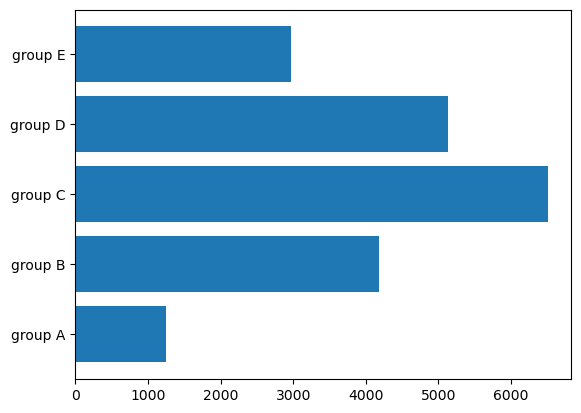

In [182]:
plt.barh(unique_ethnicity, ethnicity_math_score_sum)
plt.show()

Menampilkan grafik dari data unique_parental_level_of_education dan parental_level_of_education_math_score_sum

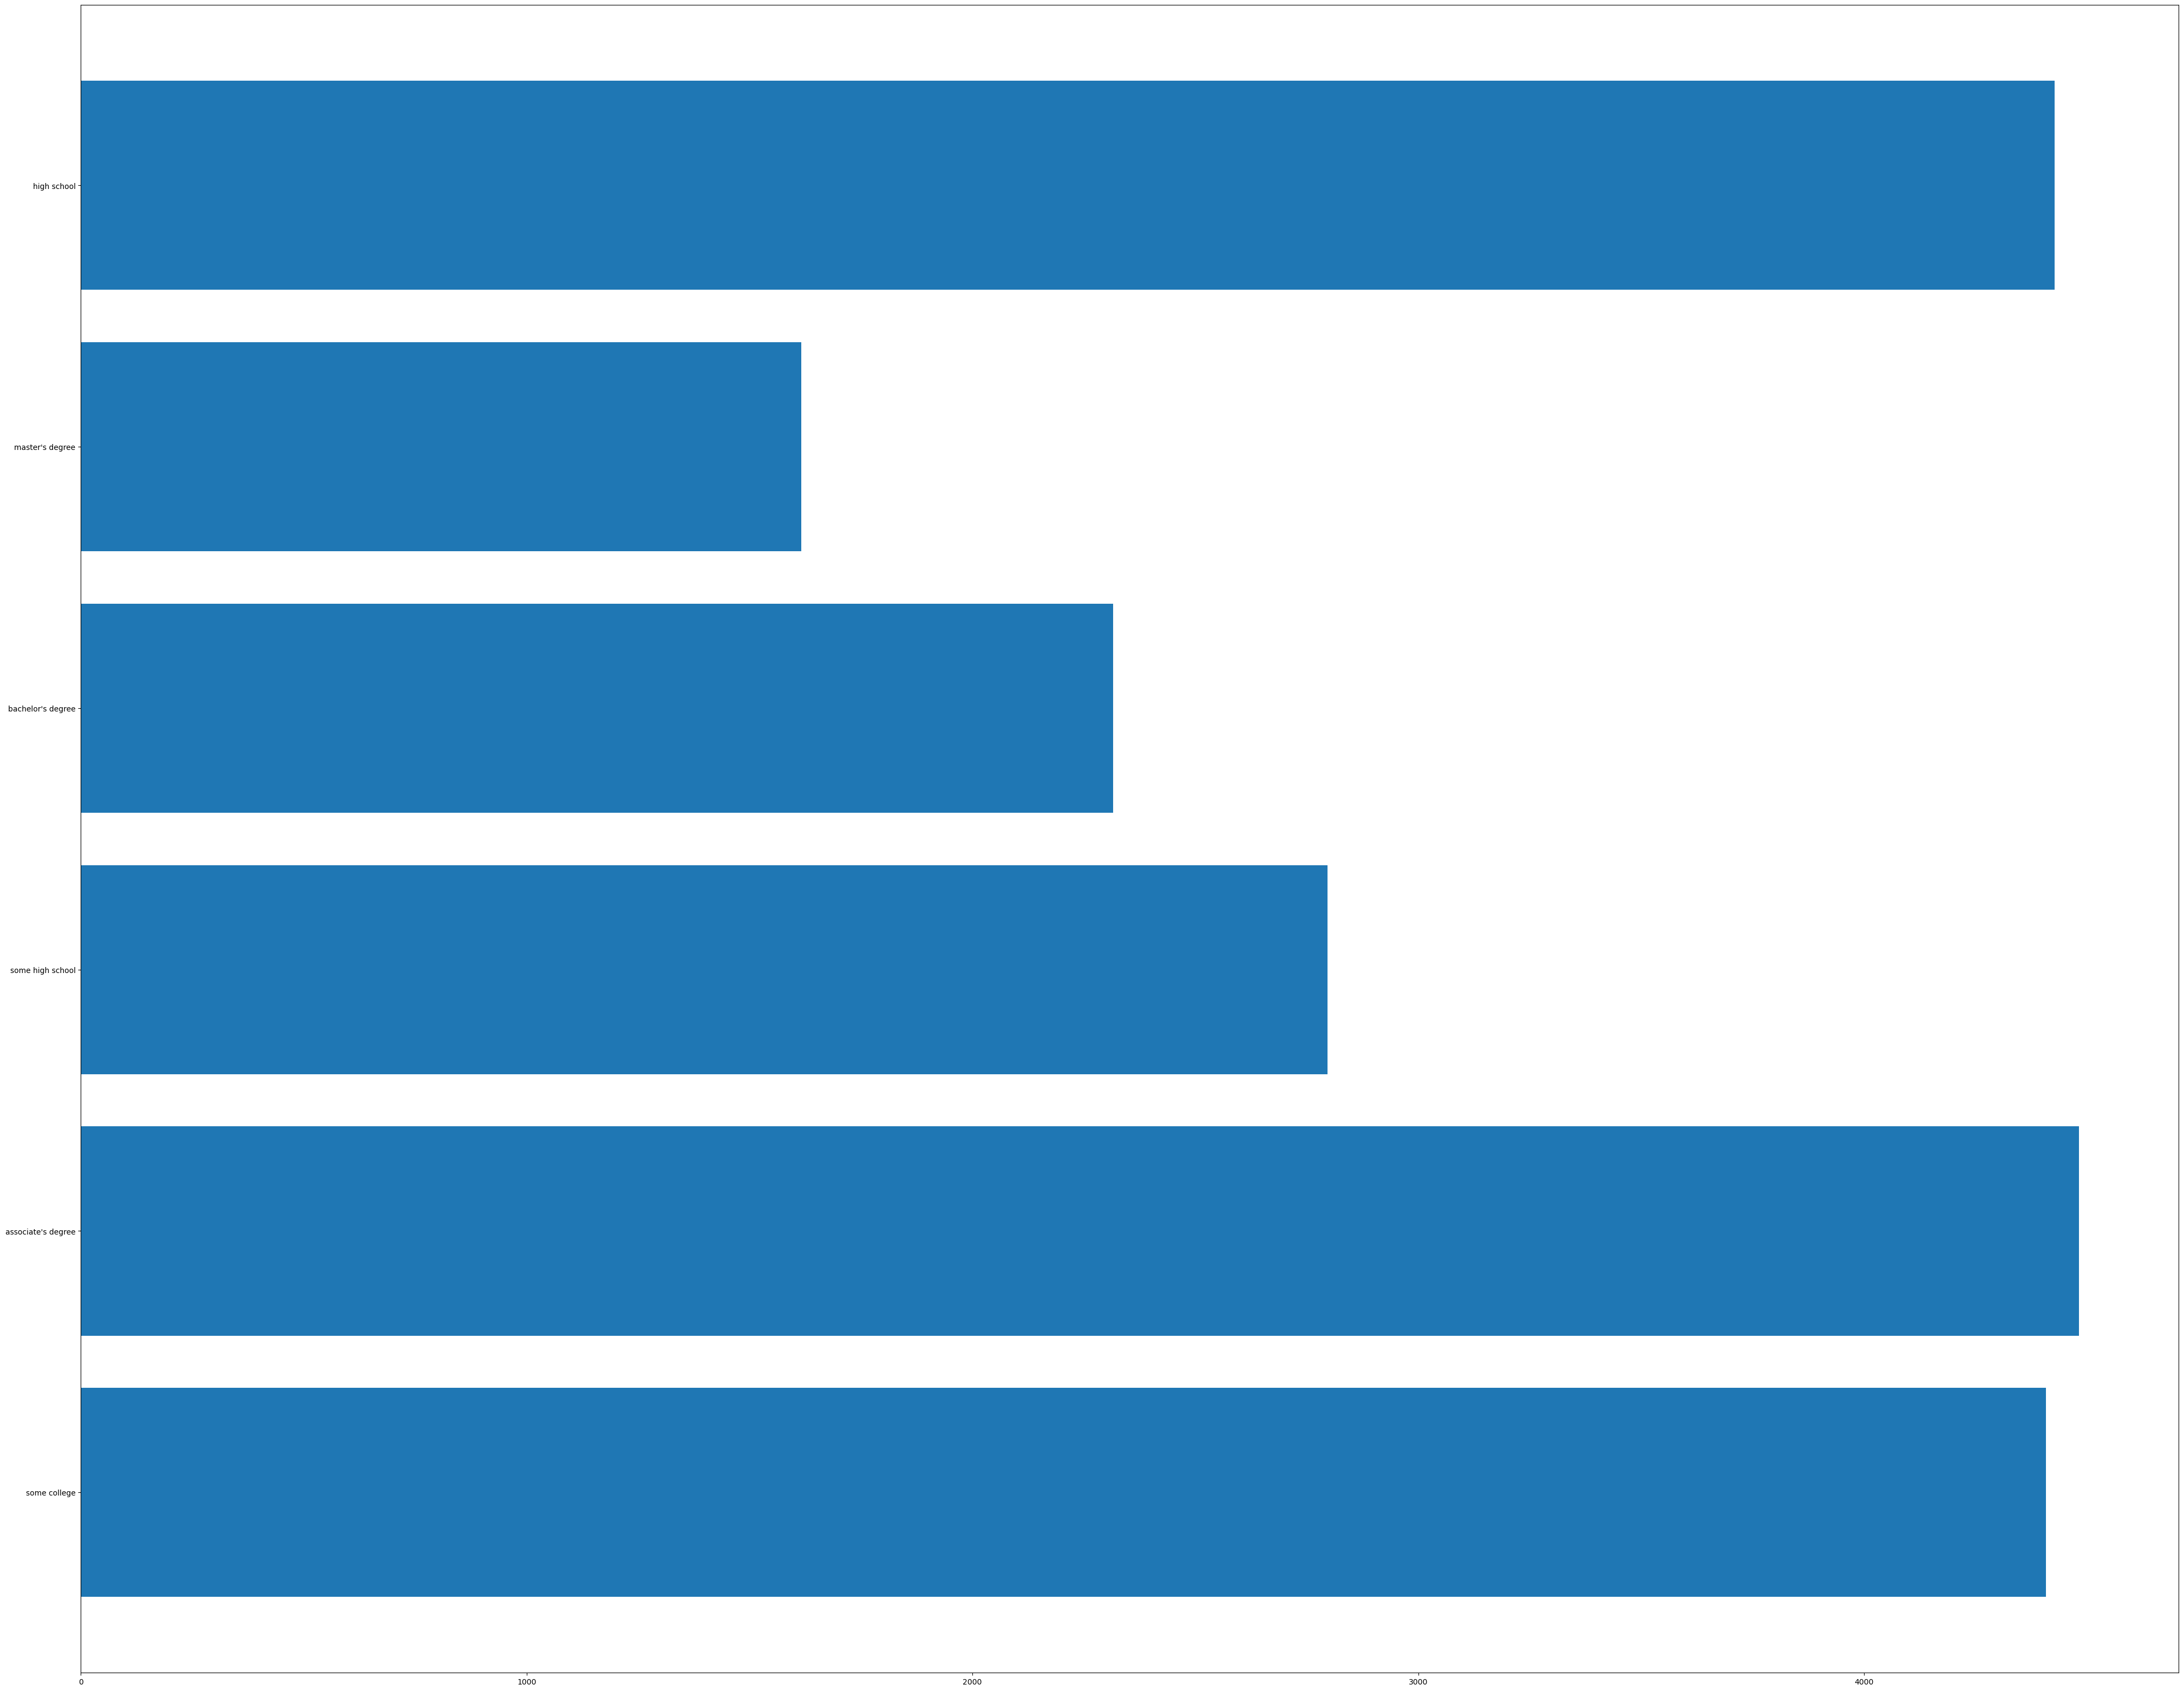

In [183]:
plt.figure(figsize=(50,40))
plt.barh(unique_parental_level_of_education, parental_level_of_education_math_score_sum)
plt.show()

Menampilkan dengan Diagram Pie dari data unique_ethnicity dan ethnicity_math_score_sum

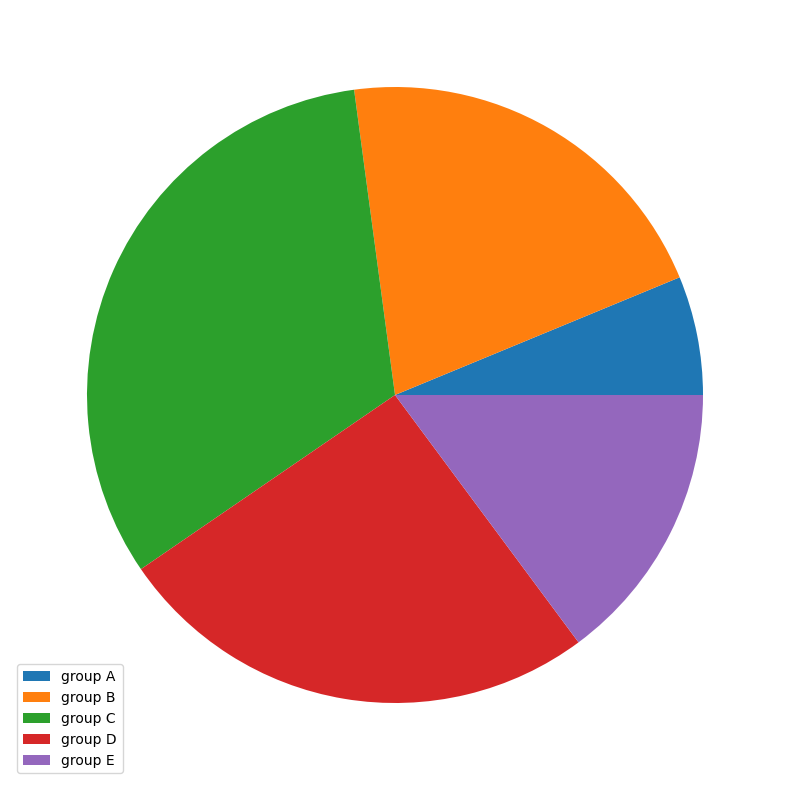

In [184]:
plt.figure(figsize=(10,10))
plt.pie(ethnicity_math_score_sum)
plt.legend(unique_ethnicity, loc='best')
plt.show()

Menampilkan dengan Diagram Pie dari data unique_parental_level_of_education dan parental_level_of_education_math_score_sum

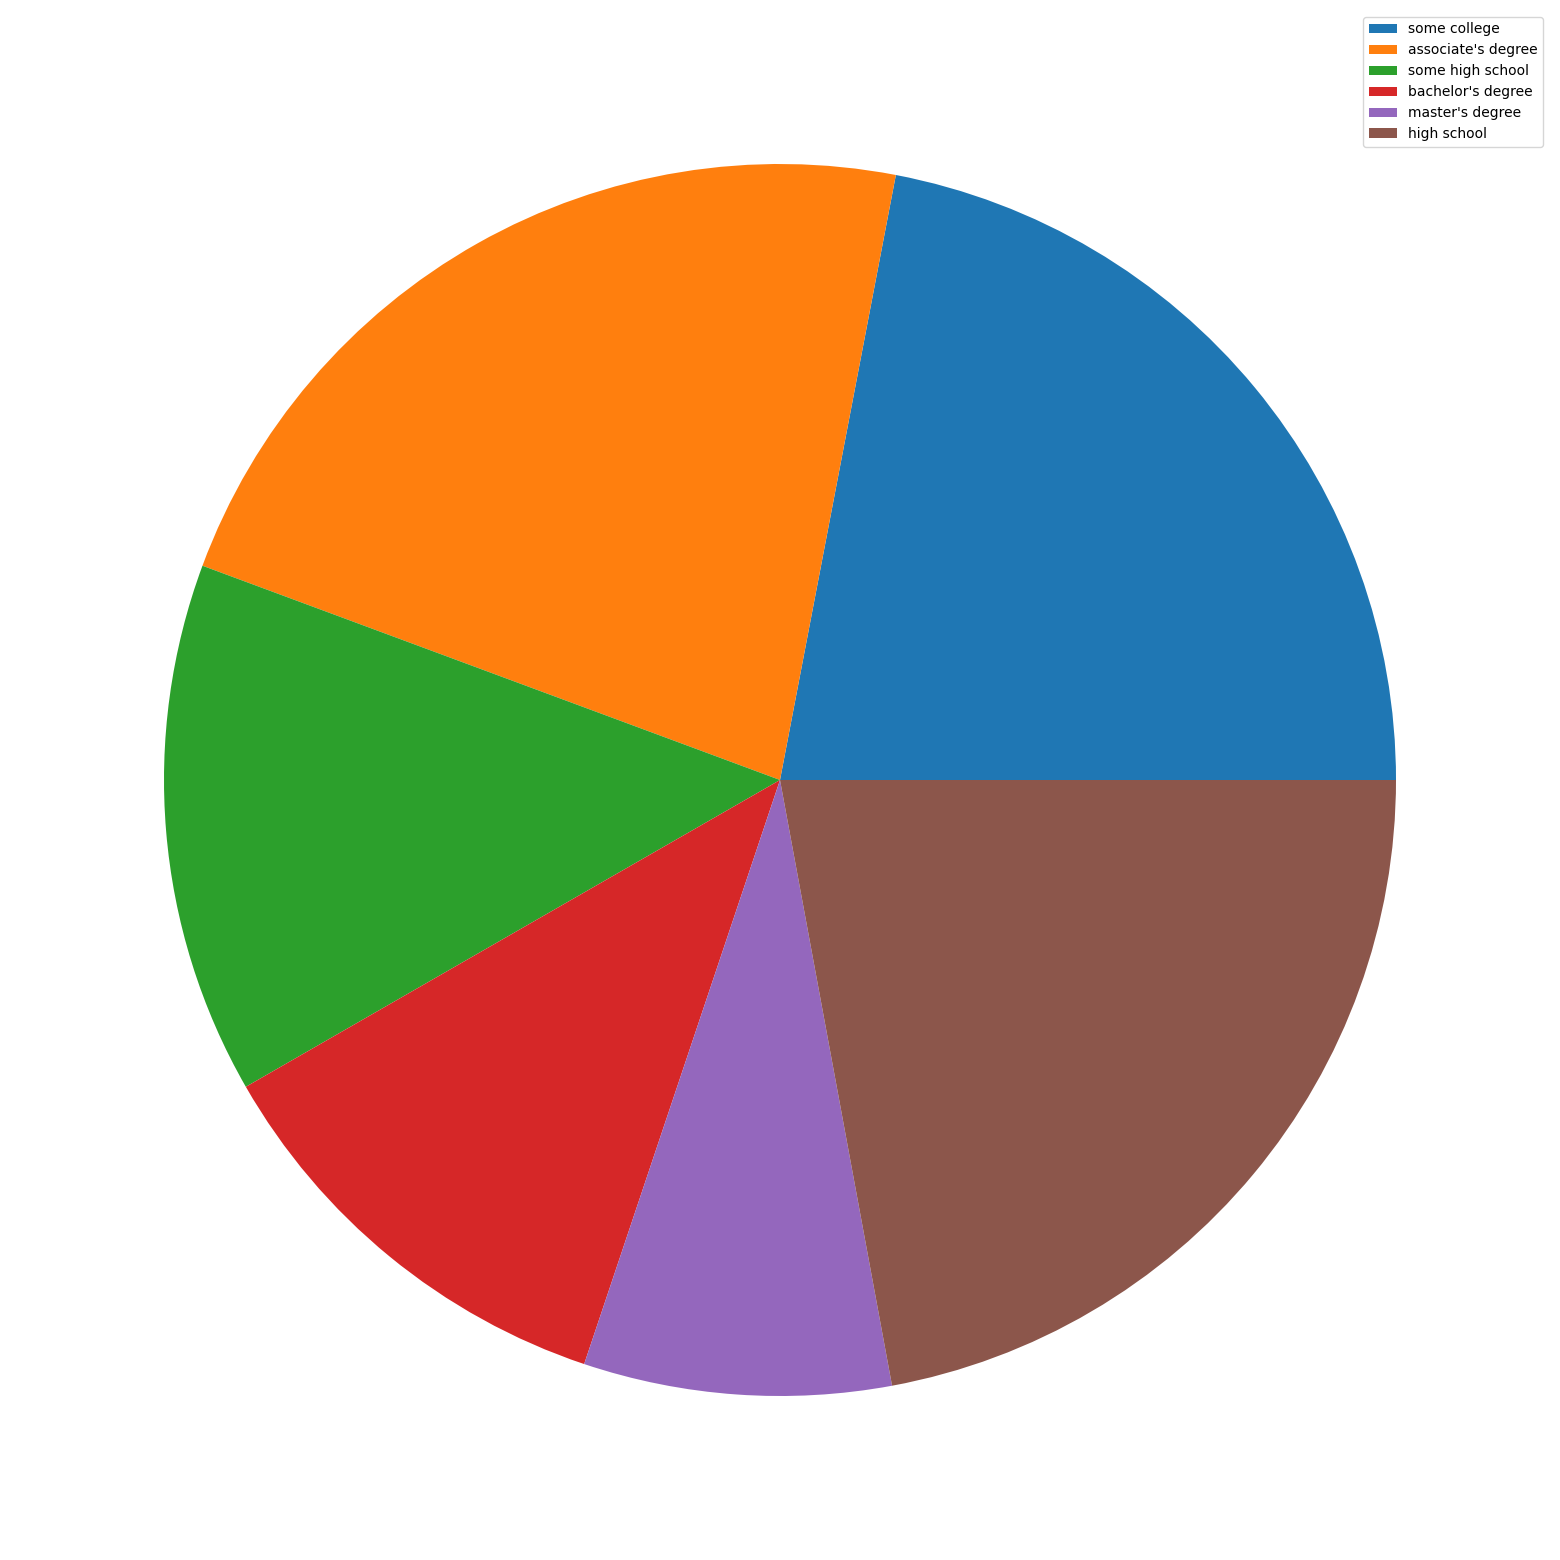

In [185]:
plt.figure(figsize=(20,20))
plt.pie(parental_level_of_education_math_score_sum)
plt.legend(unique_parental_level_of_education, loc='best')
plt.show()